<h1 style="text-align: center;">ENGR350</h1>
<h1 style="text-align: center;">Introduction Data Science with Python Term - Project</h1>
<h3 style="text-align: center;"><strong>Hotel Booking ML Models and Predictions</strong></h3>
<h2 style="text-align: center;">Banu Yobaş</h2>
<h3 style="text-align: center;">Fırat Tamur - Kutay Eroğlu</h3>
<h3 style="text-align: center;">May 21, 2020</h3>

In [1]:
# importing data libraries

import numpy as np
import pandas as pd

# importing visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing models from sklearn and tensorflow.keras

# sklearn classification algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix

# tensorflow.keras Sequential model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.backend import clear_session


### Read Data:

In [3]:
data = pd.read_csv('../Data/hotel_bookings_cleaned.csv')

In [4]:
data.shape

(118894, 269)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118894 entries, 0 to 118893
Columns: 269 entries, is_canceled to customer_type_Transient-Party
dtypes: float64(4), int64(265)
memory usage: 244.0 MB


In [6]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [7]:
data.isnull().values.any()

False

In [8]:
data.describe()

# we have different range of values.
# most of our columns consist dummy variables 

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,...,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000
mean,0.371348,104.313784,27.166737,0.928878,2.502111,1.855745,0.104126,0.007788,0.032012,0.221147,...,0.002347,0.000008,0.000017,0.876074,0.122563,0.001363,0.034274,0.004794,0.750013,0.210919
std,0.483167,106.904302,13.589887,0.996181,1.900065,0.488923,0.398146,0.089238,0.176032,0.652764,...,0.048385,0.002900,0.004101,0.329498,0.327936,0.036888,0.181933,0.069074,0.433007,0.407963
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,161.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,53.000000,16.000000,41.000000,5.000000,3.000000,2.000000,1.000000,21.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
X = data.drop(['is_canceled'], axis=1).values
y = data['is_canceled'].values

In [10]:
X.shape, y.shape

((118894, 268), (118894,))

In [11]:
train_data_length = X.shape[0]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:train_data_length], y[:train_data_length], test_size=0.1)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((107004, 268), (11890, 268), (107004,), (11890,))

### Standardize Data:

In [14]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [15]:
pd.DataFrame(X_train).describe() # result of standardization

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
count,1.070040e+05,1.070040e+05,1.070040e+05,1.070040e+05,1.070040e+05,1.070040e+05,1.070040e+05,1.070040e+05,1.070040e+05,1.070040e+05,...,1.070040e+05,1.070040e+05,1.070040e+05,1.070040e+05,1.070040e+05,1.070040e+05,1.070040e+05,1.070040e+05,1.070040e+05,1.070040e+05
mean,4.294639e-17,3.685388e-17,8.350225e-18,3.354201e-17,3.047915e-17,3.008073e-17,-2.908468e-17,2.792262e-17,2.747440e-18,-5.046657e-18,...,-7.702792e-18,1.531428e-18,1.676685e-18,5.586184e-17,-3.393213e-17,2.045224e-17,2.008702e-18,1.181980e-17,-6.729983e-17,-1.308147e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-9.767182e-01,-1.926124e+00,-9.307626e-01,-1.314286e+00,-3.796049e+00,-2.617225e-01,-8.741091e-02,-1.820614e-01,-3.374246e-01,-1.327995e-01,...,-4.906691e-02,-3.057046e-03,-4.323337e-03,-2.657058e+00,-3.739573e-01,-3.721615e-02,-1.887223e-01,-6.933883e-02,-1.732526e+00,-5.167004e-01
25%,-8.082092e-01,-8.226712e-01,-9.307626e-01,-7.891880e-01,2.956217e-01,-2.617225e-01,-8.741091e-02,-1.820614e-01,-3.374246e-01,-1.327995e-01,...,-4.906691e-02,-3.057046e-03,-4.323337e-03,3.763561e-01,-3.739573e-01,-3.721615e-02,-1.887223e-01,-6.933883e-02,5.771920e-01,-5.167004e-01
50%,-3.307672e-01,6.009089e-02,7.155533e-02,-2.640899e-01,2.956217e-01,-2.617225e-01,-8.741091e-02,-1.820614e-01,-3.374246e-01,-1.327995e-01,...,-4.906691e-02,-3.057046e-03,-4.323337e-03,3.763561e-01,-3.739573e-01,-3.721615e-02,-1.887223e-01,-6.933883e-02,5.771920e-01,-5.167004e-01
75%,5.305009e-01,7.957260e-01,1.073873e+00,2.610082e-01,2.956217e-01,-2.617225e-01,-8.741091e-02,-1.820614e-01,-3.374246e-01,-1.327995e-01,...,-4.906691e-02,-3.057046e-03,-4.323337e-03,3.763561e-01,-3.739573e-01,-3.721615e-02,-1.887223e-01,-6.933883e-02,5.771920e-01,-5.167004e-01
max,5.922788e+00,1.899179e+00,1.510633e+01,2.021474e+01,6.433128e+00,7.266599e+00,2.247789e+01,5.492653e+00,3.173217e+01,2.218791e+01,...,2.038033e+01,3.271131e+02,2.313028e+02,3.763561e-01,2.674102e+00,2.687006e+01,5.298790e+00,1.442193e+01,5.771920e-01,1.935358e+00


In [16]:
# PCA Dimension Reduction

from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [17]:
X_train.shape, X_test.shape

((107004, 220), (11890, 220))

### Create Models and Fit with KFold

In [18]:
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')

kfold = StratifiedKFold(n_splits=10)

# Modeling with different algorithms

state = 42
classifiers = list()

# algorithms = ["SVC","DecisionTree", "RandomForest","GradientBoosting", "KNeighboors","LogisticRegression",
#               "LinearDiscriminantAnalysis", "Keras"]

algorithms = ["LogisticRegression", "LinearDiscriminantAnalysis", "Keras"]

tree_algorithms = {"DecisionTree": 1, "RandomForest": 2, "GradientBoosting": 3}

# classifiers.append(SVC(random_state=state, kernel='rbf'))
# classifiers.append(DecisionTreeClassifier(random_state=state))
# classifiers.append(RandomForestClassifier(random_state=state))
# classifiers.append(GradientBoostingClassifier(random_state=state))
# classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = dict()

for i in tqdm(range(len(classifiers))):
    cv_results[algorithms[i]] = cross_val_score(classifiers[i], X_train, y_train, scoring='accuracy', cv = kfold, verbose=1, n_jobs=-1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   36.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   39.0s finished


### Keras Sequential Model:

In [19]:
model = Sequential()

model.add(Dense(128, input_shape=(X_train.shape[1],), activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=32, batch_size=128, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=0)

print(score)

Train on 85603 samples, validate on 21401 samples
Epoch 1/32
85603/85603 [==============================] - 10s 120us/sample - loss: 0.4110 - accuracy: 0.8046 - val_loss: 0.3619 - val_accuracy: 0.8283
Epoch 2/32
85603/85603 [==============================] - 8s 94us/sample - loss: 0.3475 - accuracy: 0.8362 - val_loss: 0.3404 - val_accuracy: 0.8393
Epoch 3/32
85603/85603 [==============================] - 8s 94us/sample - loss: 0.3284 - accuracy: 0.8459 - val_loss: 0.3328 - val_accuracy: 0.8469
Epoch 4/32
85603/85603 [==============================] - 8s 93us/sample - loss: 0.3143 - accuracy: 0.8524 - val_loss: 0.3261 - val_accuracy: 0.8485
Epoch 5/32
85603/85603 [==============================] - 8s 93us/sample - loss: 0.3041 - accuracy: 0.8576 - val_loss: 0.3212 - val_accuracy: 0.8541
Epoch 6/32
85603/85603 [==============================] - 9s 105us/sample - loss: 0.2931 - accuracy: 0.8640 - val_loss: 0.3221 - val_accuracy: 0.8530
Epoch 7/32
85603/85603 [=============================

In [20]:
cv_results['Keras'] = np.array([score[1]])

In [21]:
cv_means = {}
cv_std = {}

for algorithm in cv_results.keys():
    cv_means[algorithm] = [cv_results[algorithm].mean(), cv_results[algorithm].std()]

cv_means = {k: v for k, v in sorted(cv_means.items(), key=lambda item: item[1], reverse=True)}
cv = np.array(list(cv_means.values()))
    
cv_df = pd.DataFrame({"Algorithm": list(cv_means.keys()), "CVMean": cv[:, 0], "CVStd": cv[:, 1]})

In [22]:
cv_df

,Algorithm,CVMean,CVStd
0,Keras,0.846089,0.000000
1,LogisticRegression,0.811185,0.004038
2,LinearDiscriminantAnalysis,0.787569,0.006361


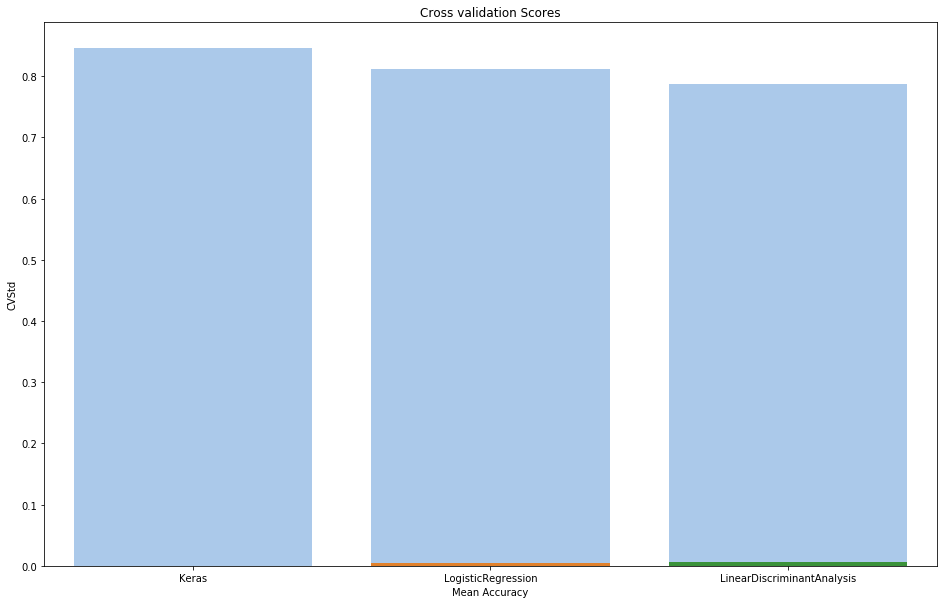

In [23]:
plt.figure(figsize=(16, 10))

sns.set_color_codes("pastel")
g = sns.barplot(x='Algorithm', y='CVMean', data=cv_df, color='b')
sns.set_color_codes("muted")
g = sns.barplot(x='Algorithm', y='CVStd', data=cv_df)

g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation Scores")

In [24]:
def plot_feature_importance(classifier, name):
    
    plt.figure(figsize=(16, 8))
    
    indices = np.argsort(classifier.feature_importances_)[::-1][:20]
    
    importances = classifier.feature_importances_[indices]
    columns = data.drop(['is_canceled'], axis=1).columns[indices]
    
    g = sns.barplot(x=importances, y=columns)
    
    plt.title(name)
    plt.show(g)

In [26]:
# for tree in tree_algorithms.keys():
#     classifiers[tree_algorithms[tree]].fit(X_train, y_train)
#     plot_feature_importance( classifiers[tree_algorithms[tree]], tree)

### Test Data:

In [27]:
test_results = dict()

for i in tqdm(range(len(classifiers))):
    classifiers[i].fit(X_train, y_train)
    test_results[algorithms[i]] = classifiers[i].score(X_test, y_test)

test_results['Keras'] = model.evaluate(X_test, y_test, verbose=0)[1]

In [28]:
test_scores = {}

for algorithm in test_results.keys():
    test_scores[algorithm] = test_results[algorithm]

test_results = {k: v for k, v in sorted(test_scores.items(), key=lambda item: item[1], reverse=True)}
    
test_df = pd.DataFrame({"Algorithm": list(cv_means.keys()), "TestScore": list(test_results.values())})

In [29]:
test_df

,Algorithm,TestScore
0,Keras,0.846089
1,LogisticRegression,0.803701
2,LinearDiscriminantAnalysis,0.785366


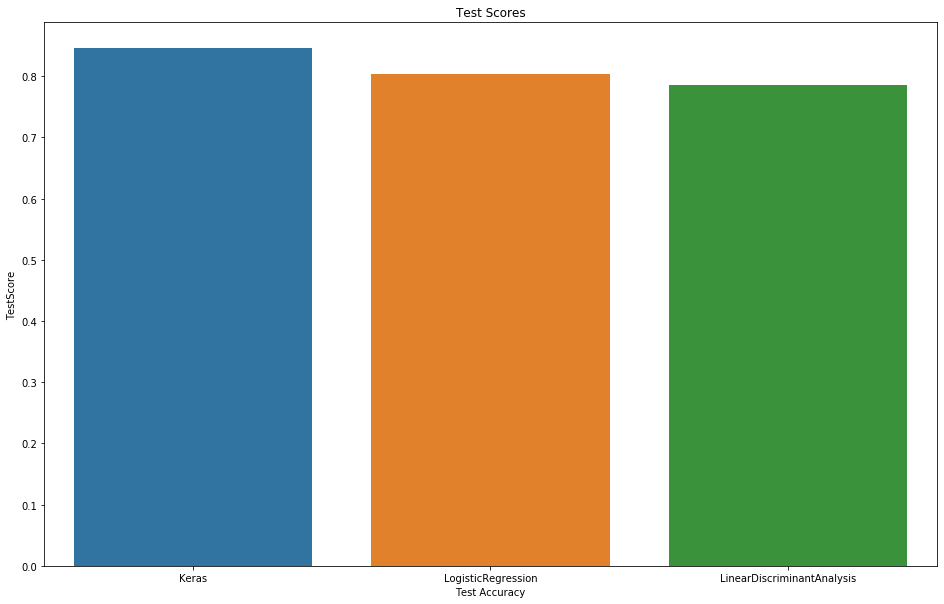

In [30]:
plt.figure(figsize=(16, 10))

g = sns.barplot(x='Algorithm', y='TestScore', data=test_df)

g.set_xlabel("Test Accuracy")
g = g.set_title("Test Scores")